# Hausaufgabe 3 &ndash; Normal Edition
## "Malen nach Zahlen"
<!-- Lizensiert unter (CC BY 4.0), Gert Herold -->

Um das Strömungsfeld um einen kreisförmigen Zylinder mit einem Durchmesser von 7,5 mm besser zu verstehen, wurden [CFD-Simulationen](https://de.wikipedia.org/wiki/Numerische_Str%C3%B6mungsmechanik) durchgeführt. 
Die Berechnungen wurden auf einem unregelmäßigen 2D-Gitter durchgeführt, das den Zylinder durchschneidet, so dass er darin als Kreis erscheint. 
Die Ergebnisse für einen diskreten Zeitpunkt wurden als [CSV-Datei](https://de.wikipedia.org/wiki/CSV_(Dateiformat)) exportiert.

**Die gesamte Programmierung für diese Aufgabe kann ohne if-Anweisungen oder Schleifen durchgeführt werden! Es ist okay, wenn Sie diese zunächst für eine erste Lösung benötigen, aber versuchen Sie, eine Variante zu finden, die diese Strukturen nicht benötigt und stattdessen die Funktionalitäten von Numpy nutzt.**

### 1) Gitterparameter

**1.1) Laden Sie die Daten aus der Datei `U_xyplane.csv` und entpacken Sie den Inhalt der Spalten in neue Variablen (1D-Arrays) u, v, w, x, y, z. Für wie viele Punkte liegen Daten vor?**

_Hinweise: Die Zeilen eines Arrays `A` mit 2 Zeilen lassen sich z.B. so "entpacken": `a,b = A`. Alle Werte sind in SI-Einheiten gegeben (m und m/s). Geschwindigkeitskomponenten werden in der Datei mit "U" bezeichnet, Koordinaten mit "Points"._

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

In [17]:
u = np.genfromtxt("U_xyplane.csv", skip_header = 1, delimiter = ",", usecols = (0)) #Import von Spalten in Array über genfromtxt-Funktion

v = np.genfromtxt("U_xyplane.csv", skip_header = 1, delimiter = ",", usecols = (1))

w = np.genfromtxt("U_xyplane.csv", skip_header = 1, delimiter = ",", usecols = (2))

x = np.genfromtxt("U_xyplane.csv", skip_header = 1, delimiter = ",", usecols = (3))

y = np.genfromtxt("U_xyplane.csv", skip_header = 1, delimiter = ",", usecols = (4))

z = np.genfromtxt("U_xyplane.csv", skip_header = 1, delimiter = ",", usecols = (5))

print("Es liegen Daten für", len(u), "Punkte vor.")





Es liegen Daten für 35267 Punkte vor.


Um eine grobe Vorstellung vom Setup zu bekommen, wäre es schön, einen schnellen Überblick über den Simulationsbereich einschließlich des "Zylinderkreises" zu haben.

**1.2) Bestimmen Sie die minimalen und maximalen x- und y-Werte und zeichnen Sie ein Rechteck, das die betrachtete Fläche abdeckt und einen Kreis mit (x, y) = (0.06 m, 0.15 m) und einem Durchmesser von 7.5 mm umgibt.**

  * Schreiben Sie eine Funktion, die die x- und y-Ausdehnung übergeben wird und die mit dem Befehl [_plot()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) eine  Rechteckumrandung zeichnet.

Einen Kreis in eine bestehende Abbildung einzufügen ist z.B. so möglich:
```python
    plt.gca().add_patch(Circle((x_center, y_center), radius, color='k'))
```

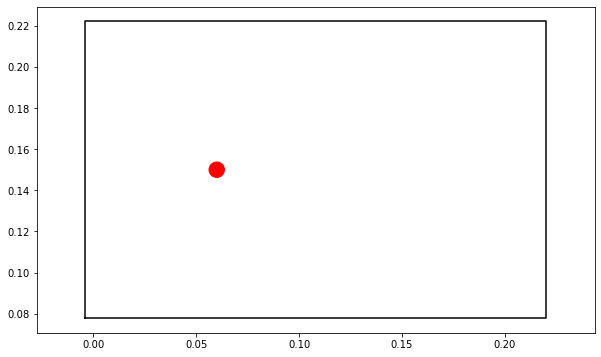

In [18]:
height = 0
width = 0

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)
def rechteck(xmin,xmax,ymin,ymax):
    height = xmax - xmin
    width =  ymax - ymin
    return height, width

plt.figure(1,(10,6))

# Rechteck plotten:
x_array = [xmin,xmax,xmax,xmin,xmin]
y_array = [ymin,ymin,ymax,ymax,ymin]
plt.plot(x_array,y_array,linestyle = '-',color='k')

# Kreis plotten ...
radius = 0.0075/2
x_center = 0.06
y_center = 0.15
plt.gca().add_patch(Circle((x_center, y_center), radius, color='r'))

# Achsenbbeschriftungen hinzufügen:
plt.axis('equal')
plt.show()

Vor der Auswertung der eigentlichen Daten soll zunächst die Gitterstruktur genauer untersucht werden.

**1.3) Visualisieren Sie das Gitter.**

  * Zeichnen Sie alle Gitterpunkte in einem 20x13-Zoll-Plot unter Verwendung von `'.'`-Markern (kleine Punkte) mit einer Größe von 0.5.
  * Bestimmen Sie den Teilbereich des Gitters, der nur Punkte mit $5.9\,$cm $< x < 6.1\,$cm and $y > 15\,$cm enthält. 
  * Wie viele Punkte liegen in diesem Bereich?
  * Zeichnen Sie die entsprechenden Gitterpunkte mit einer anderen Farbe in die ursprüngliche Abbildung ein.

_Hinweis: Um mehrere boolesche Ausdrücke in Arrays zu kombinieren, können die [bitweisen Operatoren](https://wiki.python.org/moin/BitwiseOperators) `&` (und) sowie `|` (oder) verwendet werden._

Anzahl der Punkte , die in dem Bereich liegen , ist 516


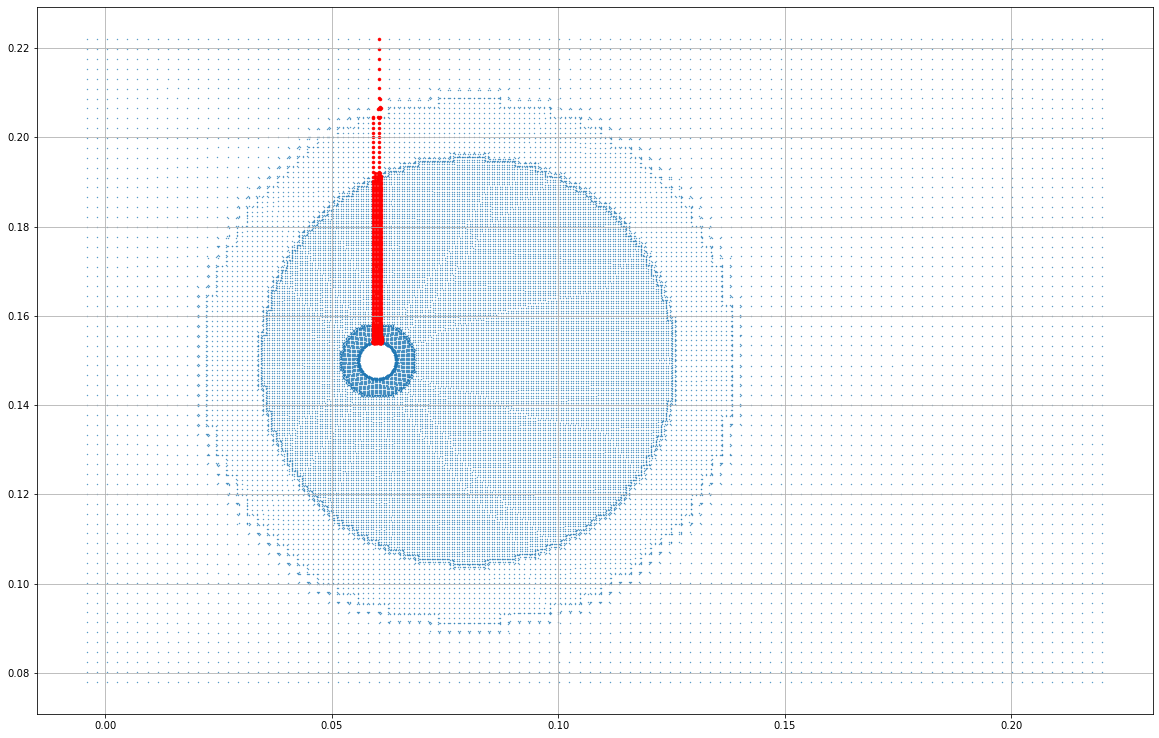

In [19]:
fig = plt.figure(figsize = (20,13))
plt.scatter(x, y, marker ='.',s = 0.5)

#Definierten Bereich bestimmen:
x_toplot = []
y_toplot = []
x_toplot = x[((x < 0.061) & (x> 0.059)  ) & (y > 0.15)]
y_toplot = y[((x < 0.061) & (x> 0.059)  ) & (y > 0.15)]

#Plotten:
plt.scatter(x_toplot,y_toplot,marker='.',color='r',linewidth=0.5)
print('Anzahl der Punkte , die in dem Bereich liegen , ist',len(x_toplot))
plt.grid()
plt.show()



**1.4) Berechnen Sie für jeden Punkt im kleineren Teilgitter den Abstand zum nächstliegenden Nachbarpunkt.**

Das ist z.B. möglich, indem die Abstände von allen Punkten zu allen anderen Punkten bestimmt werden und dann für jeden Punkt der jeweils kleinste Abstand (größer 0!) herausgesucht wird.

  * Sortieren Sie die jeweils ermittelten Nachbar-Abstände in aufsteigender Reihenfolge.
  * Erstellen Sie eine Abbildung, die auf der $x$-Achse nur den Punktindex aufträgt und die jeweiligen Nachbar-Abstände auf der logarithmisch skalierten $y$-Achse.

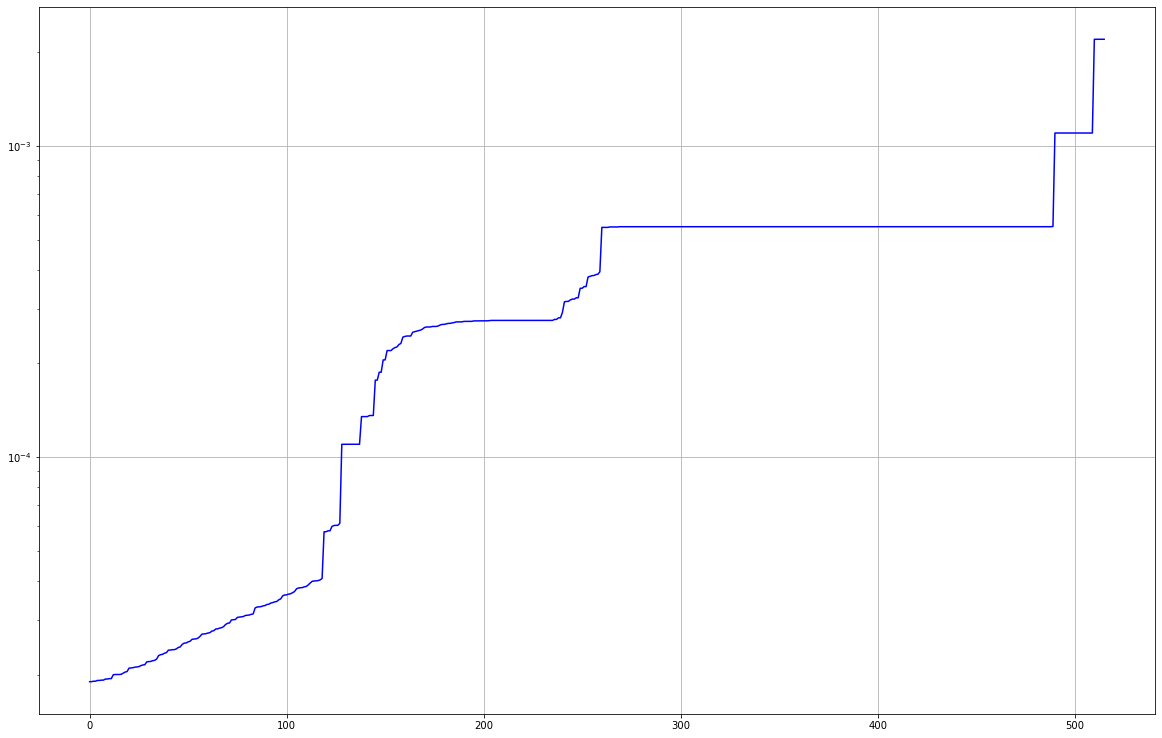

In [20]:
plt.figure(figsize = (20,13))
abstand = np.empty((len(x_toplot),len(y_toplot)))
Punktindex_list = [] #Punktindexliste für x-Achse
abstand = [] #Abstandsliste
minvalues = [] #Liste mit den minimalsten Abständen der Punkte (Entfernung zum nächsten Nachbarn)

#Berechnung aller Abstände:
for index in range (len(x_toplot)):
    abstand = ((x_toplot - x_toplot[index]) ** 2 + ((y_toplot - y_toplot[index]) ** 2 ) ) ** (1/2) #Berechnung der Abstände für Punkt
    abstand = np.sort(abstand) #Aufsteigende Sortierung der Abstände
    abstand = abstand[abstand>0] #Entfernen des Abstands zu dem Punkt selbst
    min_wert = abstand [0] #Zuweisung des minimalen Abstandwertes
    Punktindex_list.append(index) #Punktindex in die entsprechende Liste hinzufügen 
    minvalues.append(min_wert) #Minimalwert für den betrachteten Punkt der Minimalwerts-Liste hinzufügen
minvalues = np.sort(minvalues) #Minimale Werte aufsteigend sortieren

#Plotten:
plt.plot(Punktindex_list,minvalues, markersize=1,color ='b')
plt.yscale("log")
plt.grid(True)
plt.show()

## 2) Strömungsgeschwindigkeiten

Nun sollen die im Datensatz auftretenden Geschwindigkeiten näher betrachtet werden.

**2.1) Erstellen Sie für einen groben Überblick [Histogramme](https://de.wikipedia.org/wiki/Histogramm) der drei Geschwindgikeitskomponenten.**

  * Sie können hierfür die matplotlib-Funktion [_hist()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) verwenden.
  * Zeichnen Sie die drei Graphen nebeneinander (3 Plots in einer Zeile).
  * Nutzen Sie für die Histogramme je 100 Bins gleichen Umfangs.
  * Wie groß ist die höchste Geschwindigkeit in $x$-Richtung?

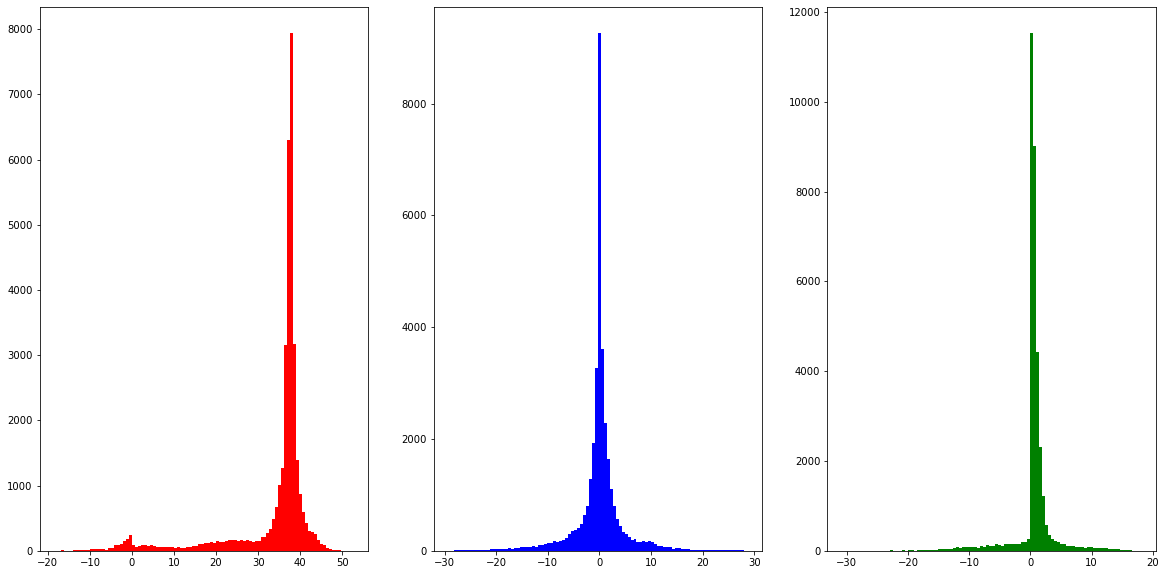

Die höchste Geschwindigkeit in x-Richtung beträgt 52.5598 Meter pro Sekunde.


In [21]:
plt.figure(figsize = (20,10))

plt.subplot(131)
plt.hist(u, bins = 100, color = "red")

plt.subplot(132)
plt.hist(v, bins = 100, color = "blue")

plt.subplot(133)
plt.hist(w, bins = 100, color = "green")

plt.show()
print("Die höchste Geschwindigkeit in x-Richtung beträgt", max(u), "Meter pro Sekunde.")

**2.2) Visualisieren Sie die Strömung in unterschiedlichen Plotvarianten.**

  * Berechnen Sie die Geschwindigkeitsbeträge (Länge der Geschwindigkeitsvektoren) an den Gitterpunkten.
  * Erzeugen Sie 4 Visualisierungen der Beträge:
      1. mithilfe der [_scatter()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)-Funktion und Farbskalierung der Werte.
      2. mithilfe der [_tricontourf()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tricontourf.html)-Funktion mit 8, 32 sowie 256 Farblevels (hier ist ausnahmsweise die Verwendung einer Schleife sinnvoll).
  * Zeichnen Sie immer den Zylinderkreis in weißer Farbe mit ein.
  * Fügen Sie jeweils einen [Colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) hinzu, damit die Farben Geschwindigkeitswerten zugeordnet werden können.

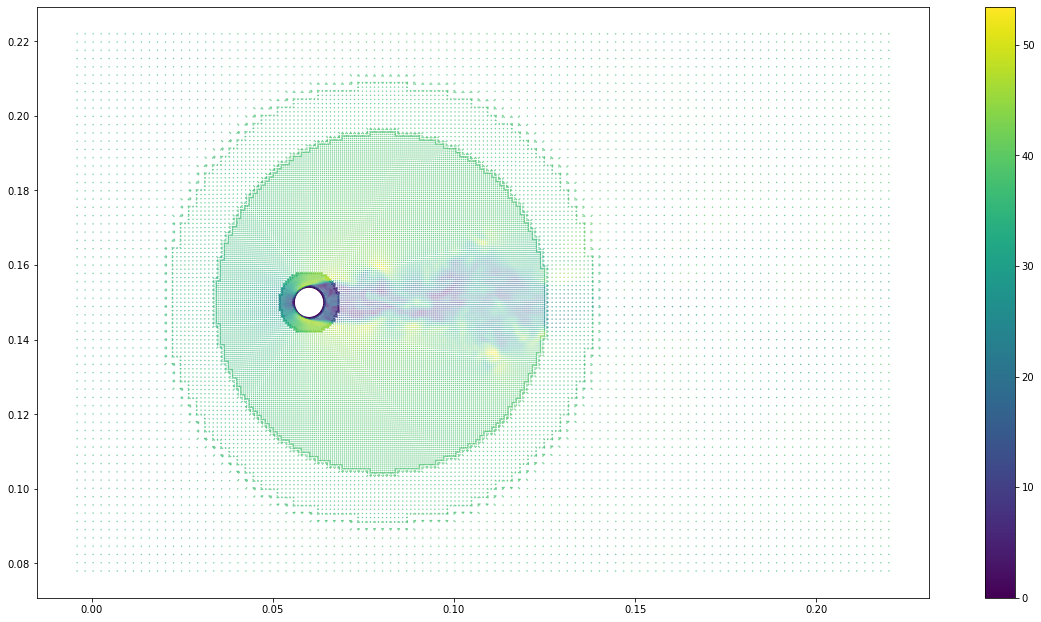

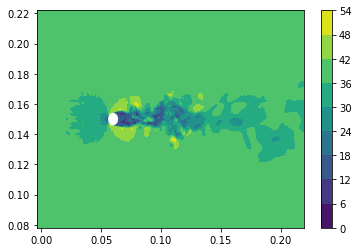

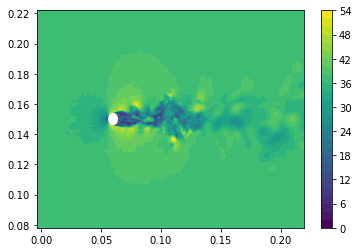

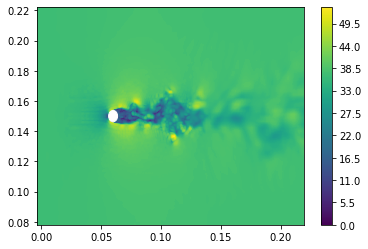

In [22]:
from numpy.linalg import norm 
plt.figure(figsize = (20,50))
plt.subplot(411)

array = np.array([u,v,w])
betrag = norm(array, axis=0)

plt.scatter(x,y,0.5, c = betrag, marker='.')
plt.gca().add_patch(Circle((x_center, y_center), radius, color='w'))
plt.colorbar()
plt.show()

plt.tricontourf(x,y,betrag,levels = 8)
plt.gca().add_patch(Circle((x_center, y_center), radius, color='w'))
plt.colorbar()
plt.show()

plt.tricontourf(x,y,betrag,levels = 32)
plt.gca().add_patch(Circle((x_center, y_center), radius, color='w'))
plt.colorbar()
plt.show()

plt.tricontourf(x,y,betrag,levels = 256)
plt.gca().add_patch(Circle((x_center, y_center), radius, color='w'))
plt.colorbar()
plt.show()
    
    

## 3) Wirbelstärke

Um "interessante" Regionen in einem Strömungsfeld zu identifizieren, wird häufig die [Wirbelstärke](https://de.wikipedia.org/wiki/Wirbelst%C3%A4rke) verwendet, die nun berechnet werden soll. 
Hier genügt die Berechnung in 2D, d.h. die Wirbelstärke in $z$-Richtung. Diese ist wie folgt definiert:

$$
    \omega_z = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
$$

Offenbar werden die partiellen Ableitungen der Geschwindigkeiten benötigt. 
Diese waren in der Datendatei jedoch nicht enthalten und müssen demzufolge aus verfügbaren Daten berechnet werden. 
Da nur diskrete Werte vorliegen, muss die Ableitung über den [Differenzenquotienten](https://de.wikipedia.org/wiki/Differenzenquotient) erfolgen. 
Dies wäre viel einfacher, wenn die Daten auf einem regelmäßigen rechteckigen Gitter vorliegen würden.

Praktischerweise enthält das SciPy-Modul mit [_griddata()_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) eine Funktion, die unregelmäßige Daten auf ein reguläres Gitter abbilden kann.
Um ein Gitter mit regelmäßigen Abständen zu erzeugen, kann zum Beispiel die Funktion [_meshgrid()_](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) zusammen mit [_arange()_](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) (beide aus dem NumPy-Modul) verwendet werden.

**3.1) Erzeugen Sie ein Gitter mit regelmäßigen Abständen und interpolieren Sie die unregelmäßig verteilten Geschwindigkeitsdaten auf dieses Gitter.**

  * Das neue Gitter sollte eine Schrittweite von $10^{-4}\,$m haben (sowohl in $x$- als auch in $y$-Richtung) und den Simulationsbereich beinhalten.
  * Interpolieren Sie $u$, $v$ und $w$ jeweils separat, sodass Sie drei neue (große) Arrays erhalten.
  * Zur Überprüfung, ob alles korrekt funktioniert hat, visualisieren Sie den Betrag der neuen Vektoren mithilfe von [_imshow()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
      * Setzen Sie den Parameter `vmax` auf einen sinnvollen Wert.
      * Tragen Sie im Parameter `extent` den tatsächlichen Umfang des Gitters ein.
      * Zeichnen Sie auch hier den weißen Kreis an die passende Position.
  

_Hinweis: Wenn Sie sich der Leistungsfähigkeit Ihres Computers nicht sicher sind, beginnen Sie mit einer gröberen Schrittweite._

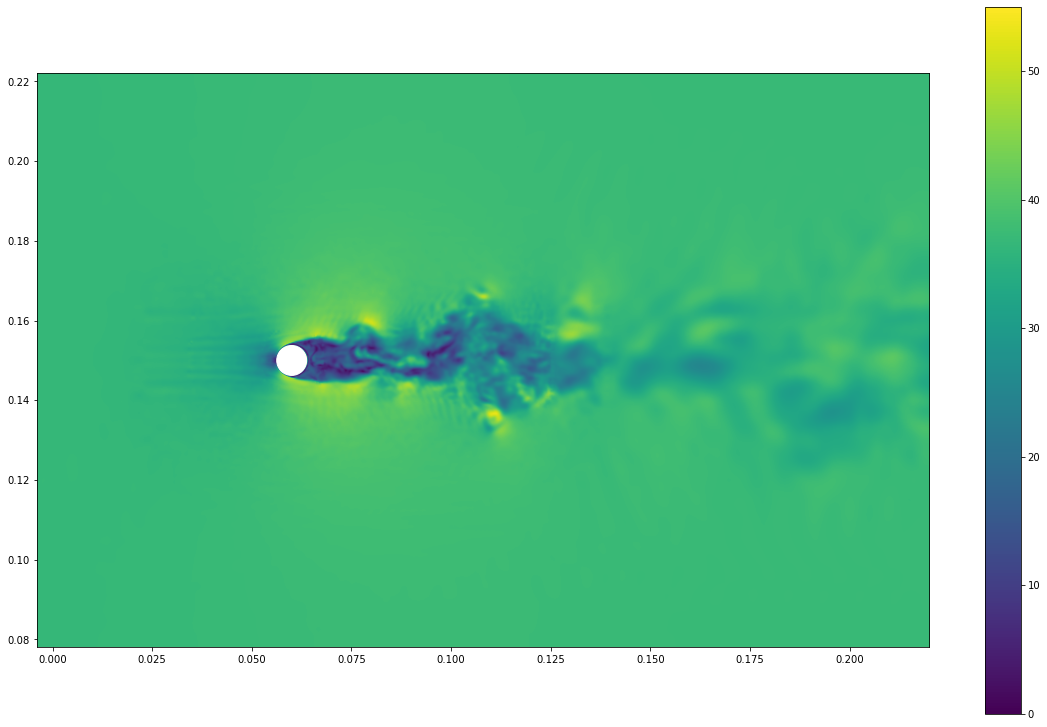

In [23]:
from scipy.interpolate import griddata # Vorschlag für Interpolationsmethode für sanfte Übergänge: "cubic"

array_x, array_y = np.meshgrid(np.arange(np.amin(x), np.amax(x), step = 10 ** (-4)), np.arange(np.amax(y), np.amin(y), step = -10 ** (-4))) #Erstellung des Gitters (bei y min und max vertauschen, da bei imshow() sonst die Abbildung horizontal gespiegelt ist)

plt.figure(figsize = (20,13))

finalplot_u = griddata((x, y), u, (array_x, array_y), method = "cubic") #griddata für die Geschwindigkeiten in die jeweilige Richtung anwenden
finalplot_v = griddata((x, y), v, (array_x, array_y), method= "cubic")
finalplot_w = griddata((x, y), w, (array_x, array_y), method= "cubic")
finalplot = (finalplot_u**2 + finalplot_v**2 + finalplot_w**2)**0.5 #Betrag aus den vorherigen daten liefert uns den Datensatz den wir auf das Gitter abbilden

circle = plt.gca().add_patch(Circle((x_center, y_center), radius, color='white')) #Plotten des Kreises
plt.imshow(finalplot, vmax = 55, extent = (min(x), max(x), min(y), max(y))) #Plotten der Abbildung
plt.colorbar() #Hinzufügen der Farbenübersicht




Mit den nun auf einem regelmäßigen Gitter vorliegenden Daten können die partiellen Ableitungen einfach approximiert werden über

$$
    \frac{\partial v_{i,j}}{\partial x} = \frac{v_{i,j+1}-v_{i,j}}{\Delta x}
$$

und

$$
    \frac{\partial u_{i,j}}{\partial y} = \frac{u_{i+1,j}-u_{i,j}}{\Delta y}~,
$$

mit $i=0\ldots N_\text{Zeilen}-1$, $j=0\ldots N_\text{Spalten}-1$.

**3.2) Berechnen Sie die Ableitungen und die Wirbelstärken $\omega_z$ entsprechend obiger Gleichungen. Visualisieren Sie die Wirbelstärken mit _imshow()_.**

  * Wählen Sie eine divergierende [Colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) und stellen Sie sicher, dass der Wert 0 darin weiß dargestellt wird.
  * Zeichnen Sie auch hier den weißen Zylinderkreis ein.
  * Setzen Sie den dargestellten Wertebereich so, dass der Plot informativ ist.
  * Fügen Sie einen Colorbar hinzu.

_Hinweis: Versuchen Sie, effizienten Code zu schreiben! Diese Berechnung sollte nicht allzu lange dauern (vielleicht einige wenige Sekunden). Erhöhen Sie zu Testzwecken die Schrittweite, falls erforderlich._

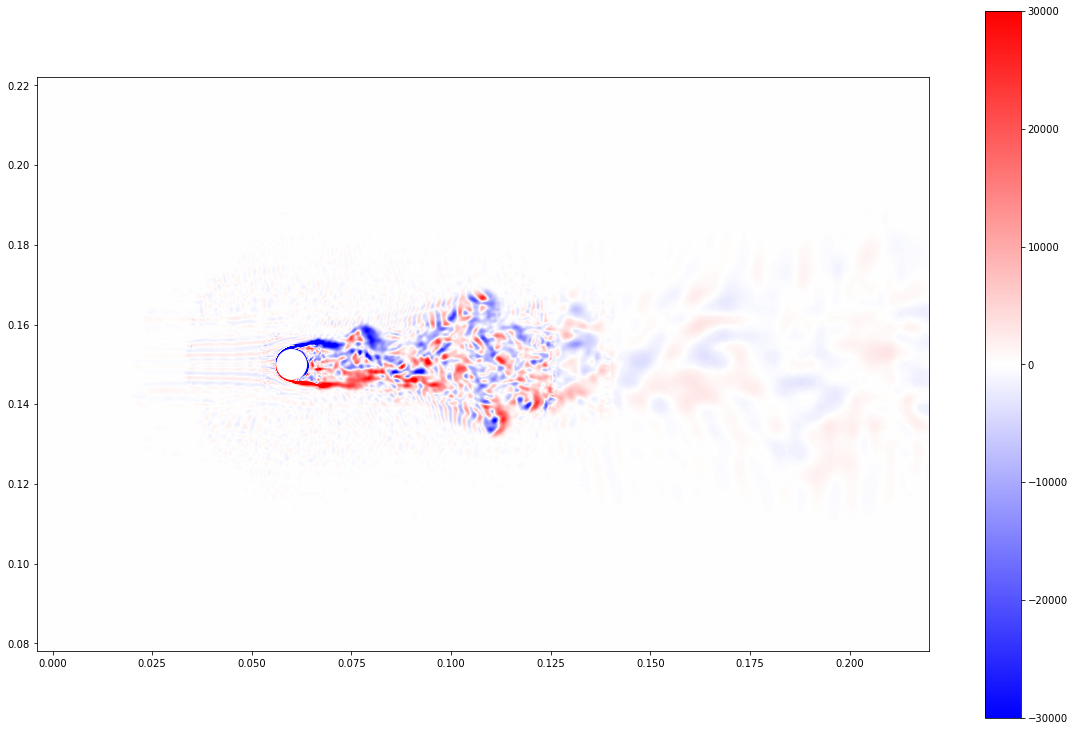

In [24]:

u_i1 = finalplot_u[:-1,]  #Matrix ohne letzte Zeile
u_i0 = finalplot_u[1:] #Matrix ohne erste Zeile
du_dy = (u_i1 - u_i0)/(10 ** (-4)) #Subtraktion der beiden resultierenden Matrizen & Division mit dy

#Berechnung für v:
v_j0 = finalplot_v[:,:-1] #Matrix ohne letzte Spalte
v_j1 = finalplot_v[:,1:] #Matrix ohne erste Spalte
dv_dx = (v_j1 - v_j0)/(10 ** (-4)) #Subtraktion der beiden Matrizen

#Berechnung der Wirbelstärke:
omega_z = dv_dx[:-1,] - du_dy[:,:-1]

#Plotten:
plt.figure(figsize = (20,13))
circle = plt.gca().add_patch(Circle((x_center, y_center), radius, color='white'))
plt.imshow(omega_z, cmap = "bwr", vmax = 30000, vmin = -30000, extent = (min(x), max(x), min(y), max(y)))
plt.colorbar()